<a href="https://colab.research.google.com/github/anujaagarwal/gsoc_eval/blob/master/GSoC_Awake_Evaluation_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is the hdf5 file


In [0]:
file_path = '1541962108935000000_167_838(1).h5'

#Task 1



In [0]:
from datetime import datetime
import pytz

digit_number = int(file_path[:18+1]) // (10**9) #/* Converted nanoseconds into seconds /* 
datetime = datetime.fromtimestamp(digit_number)

datetime_UTC = pytz.utc.localize(datetime)
print("UTC:", datetime_UTC)
datetime_cern = pytz.timezone('CET').localize(datetime)
print("Cern local time:", datetime_cern)

UTC: 2018-11-11 18:48:28+00:00
Cern local time: 2018-11-11 18:48:28+01:00


# Task 2


Importing all the necessary dependancies 

In [0]:
import h5py  
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import csv
import h5py
import logging
import logging.config
import sys
# import logging
import time
import json
import os
# Logging config
logger = logging.getLogger()
logger.setLevel(logging.WARNING)


In [0]:
file_path = '1541962108935000000_167_838(1).h5'
def sit(name, obj):
    if isinstance(obj, h5py.Dataset):
        features = dataToList(name, obj)

        with open('data.csv', 'a', newline='') as csvfile:
            csvwr = csv.writer(csvfile, delimiter=',', quotechar='"')
            csvwr.writerow(features)

            
def dataToList(name, obj):
    output = []

    nameSep = name.split('/')
    output.append('/'.join(nameSep[:-1]))
    output.append(nameSep[-1])

    try:
        output.append(str(obj.dtype))
    except TypeError as e:
       
        logger.info(f'"{name}" filetype not supported: {e}')
        output.append('Not supported')

    output.append(str(obj.shape))
    output.append(str(obj.size))

    return output

with h5py.File(file_path, 'r') as file:
    with open('data.csv', 'w', newline='') as csvfile:
        print('groups-name,dataset-name,dtype,shape,size', file=csvfile)

    file.visititems(sit)

# Task 3


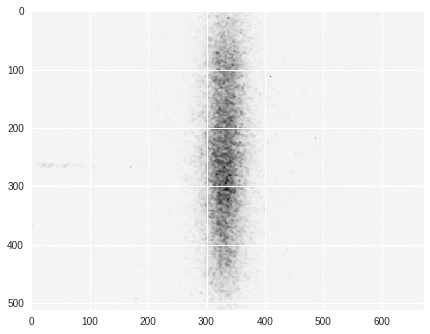

In [0]:

file_path = '1541962108935000000_167_838(1).h5'
with h5py.File(file_path, 'r') as file:   #/* To open a file in read mode */
    imageRawData = np.array(file.get('/AwakeEventData/XMPP-STREAK/StreakImage/streakImageData'))
    height = file.get('/AwakeEventData/XMPP-STREAK/StreakImage/streakImageHeight')[0]
    width = file.get('/AwakeEventData/XMPP-STREAK/StreakImage/streakImageWidth')[0]
    img = imageRawData.reshape(height, width) #/* Converted 1Darray to 2Darray /*
    Filteredimg = signal.medfilt(img) #/* Image is filtered /*
    plt.imshow(Filteredimg)
    plt.savefig('image.png')